In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os 
import snowflake.connector
import seaborn as sns


load_dotenv()

True

In [43]:


SNOWFLAKE_ACCOUNT = os.getenv("SNOWFLAKE_ACCOUNT")
SNOWFLAKE_USER = os.getenv("SNOWFLAKE_USER")
SNOWFLAKE_PASSWORD = os.getenv("SNOWFLAKE_PASSWORD")
SNOWFLAKE_ROLE = os.getenv("SNOWFLAKE_ROLE")
SNOWFLAKE_WAREHOUSE = os.getenv("SNOWFLAKE_WAREHOUSE")
SNOWFLAKE_DATABASE = os.getenv("SNOWFLAKE_DATABASE")
SNOWFLAKE_SCHEMA = os.getenv("SNOWFLAKE_SCHEMA")

# Snowflake connection parameters
conn_params = {
    'user': SNOWFLAKE_USER ,
    'password': SNOWFLAKE_PASSWORD,
    'account': SNOWFLAKE_ACCOUNT,
    'warehouse': SNOWFLAKE_WAREHOUSE,
    'database': SNOWFLAKE_DATABASE,
    'schema': SNOWFLAKE_SCHEMA,
    'role': SNOWFLAKE_ROLE
}

# Establish connection
conn = snowflake.connector.connect(**conn_params)

# Query to fetch 5-day forecast data
query = """
SELECT 
   *
FROM 
    FORECAST
"""

# Fetch data into a pandas DataFrame
data = pd.read_sql(query, conn)

# Close the connection
conn.close()

C:\Users\P R Y N S\AppData\Local\Temp\ipykernel_88100\842237849.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


In [18]:
# data = pd.read_csv("01_06_2024 06_43_56_forecast.csv")
# data['DATETIME'] = pd.to_datetime(data['DATETIME'])

In [44]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.describe()


,DATE,TEMPERATURE,FEELS_LIKE,PRESSURE,HUMIDITY,WINDSPEED,WIND_DIRECTION,CLOUDINESS,PRECIPITATION
count,40,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000
mean,2024-06-04 04:30:00,14.940500,14.214500,1019.450000,66.65000,3.204750,248.300000,66.075000,0.042000
min,2024-06-01 18:00:00,9.370000,7.790000,1011.000000,35.00000,0.650000,3.000000,2.000000,0.000000
25%,2024-06-02 23:15:00,12.962500,12.222500,1015.000000,52.75000,2.167500,259.750000,42.250000,0.000000
50%,2024-06-04 04:30:00,15.050000,14.400000,1019.000000,68.50000,3.350000,284.000000,80.500000,0.000000
75%,2024-06-05 09:45:00,17.685000,16.827500,1024.250000,74.25000,3.990000,304.000000,99.000000,0.000000
max,2024-06-06 15:00:00,20.160000,19.620000,1028.000000,97.00000,6.100000,358.000000,100.000000,0.420000
std,NaN,3.121646,3.291916,5.227884,15.98164,1.282651,105.440274,34.916301,0.099465


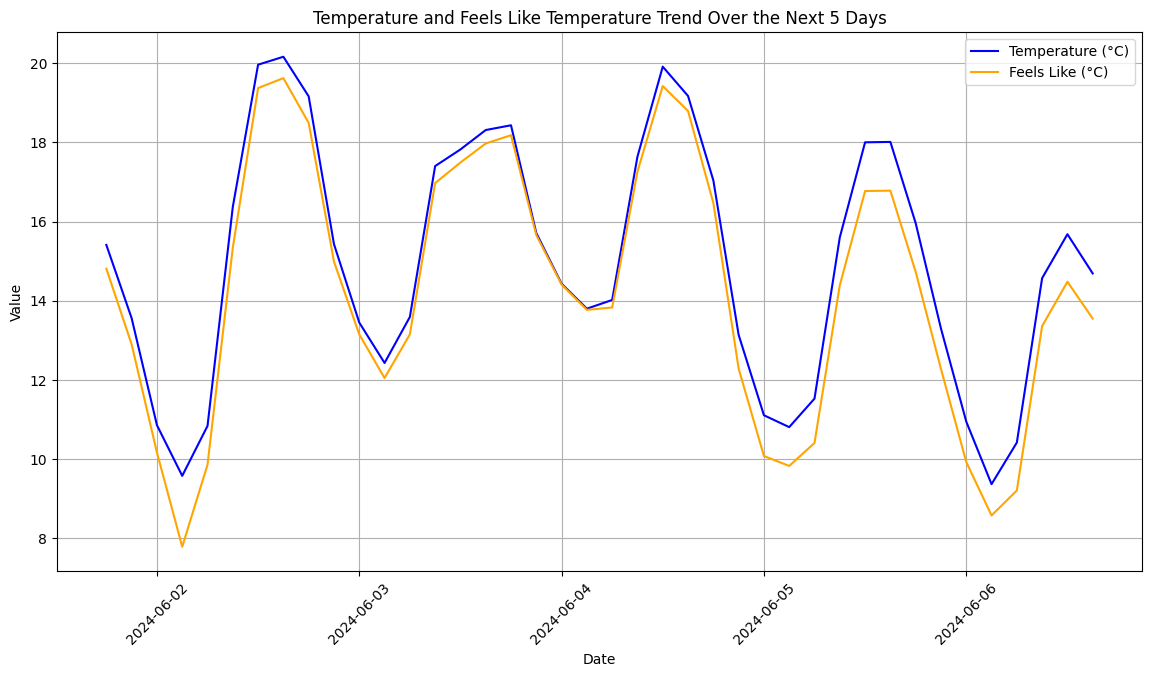

In [46]:
# Plot Temperature and Feels Like Temperature
plt.figure(figsize=(14, 7))
plt.plot(data['DATE'], data['TEMPERATURE'], label='Temperature (°C)', color='blue', linestyle='-')
plt.plot(data['DATE'], data['FEELS_LIKE'], label='Feels Like (°C)', color='orange', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Temperature and Feels Like Temperature Trend Over the Next 5 Days')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

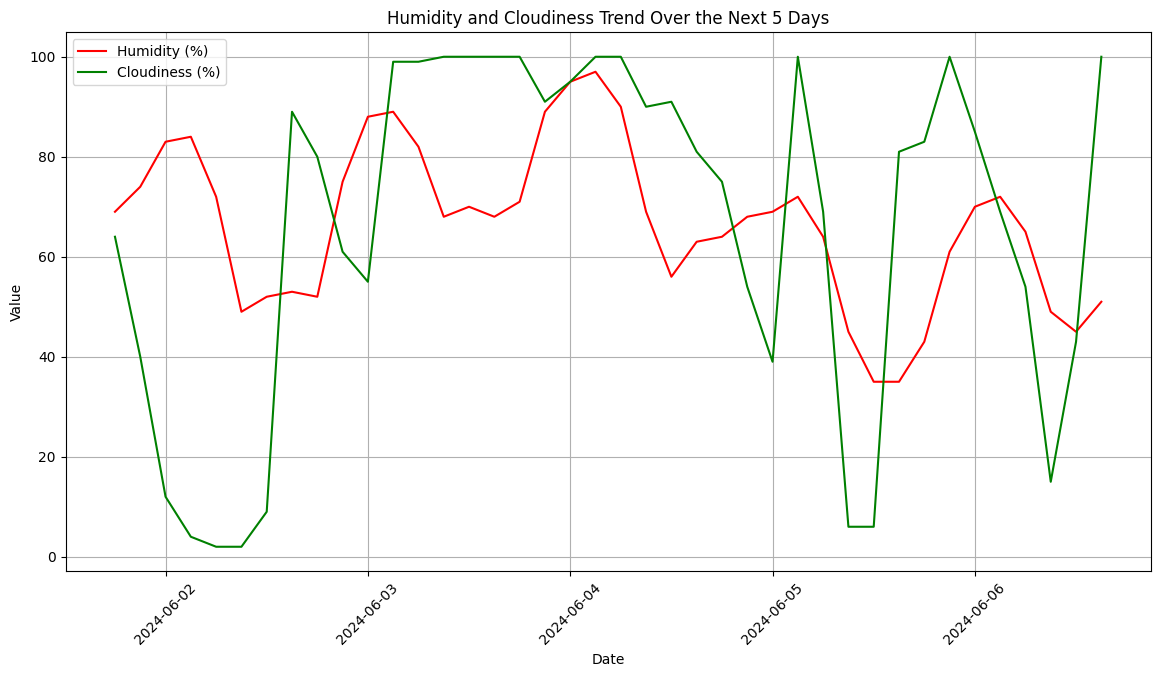

In [47]:
# Plot Humidity and Cloudiness
plt.figure(figsize=(14, 7))
plt.plot(data['DATE'], data['HUMIDITY'], label='Humidity (%)', color='red', linestyle='-')
plt.plot(data['DATE'], data['CLOUDINESS'], label='Cloudiness (%)', color='green', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Humidity and Cloudiness Trend Over the Next 5 Days')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


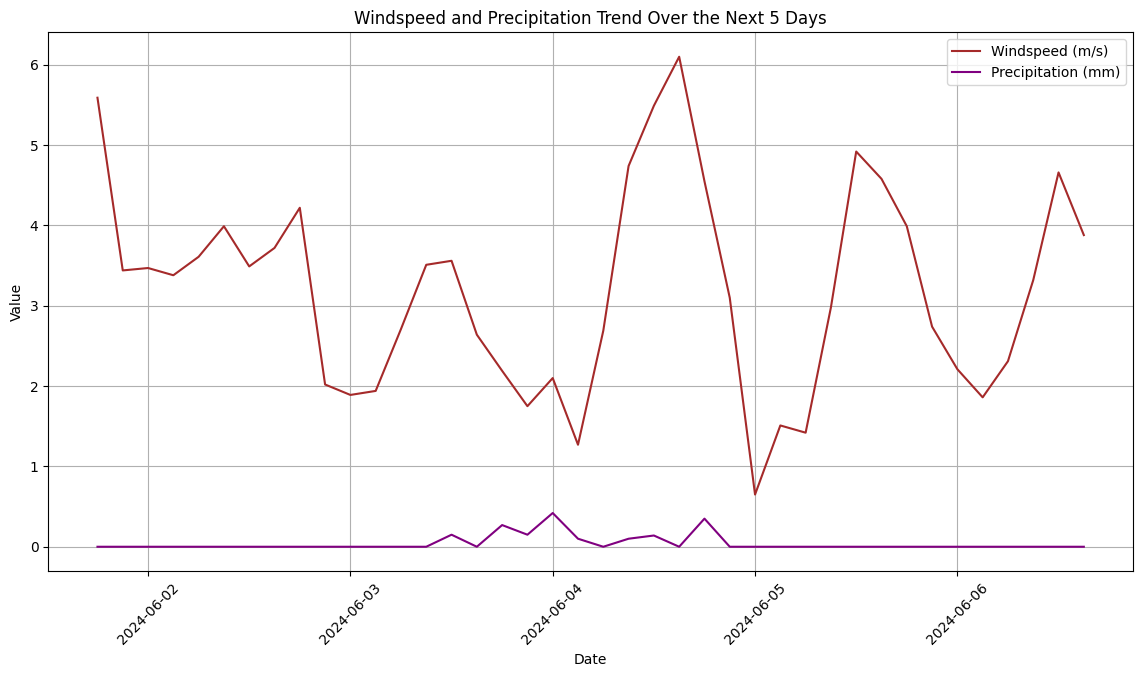

In [49]:
# Plot Windspeed and Precipitation
plt.figure(figsize=(14, 7))
plt.plot(data['DATE'], data['WINDSPEED'], label='Windspeed (m/s)', color='brown', linestyle='-')
plt.plot(data['DATE'], data['PRECIPITATION'], label='Precipitation (mm)', color='purple', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Windspeed and Precipitation Trend Over the Next 5 Days')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

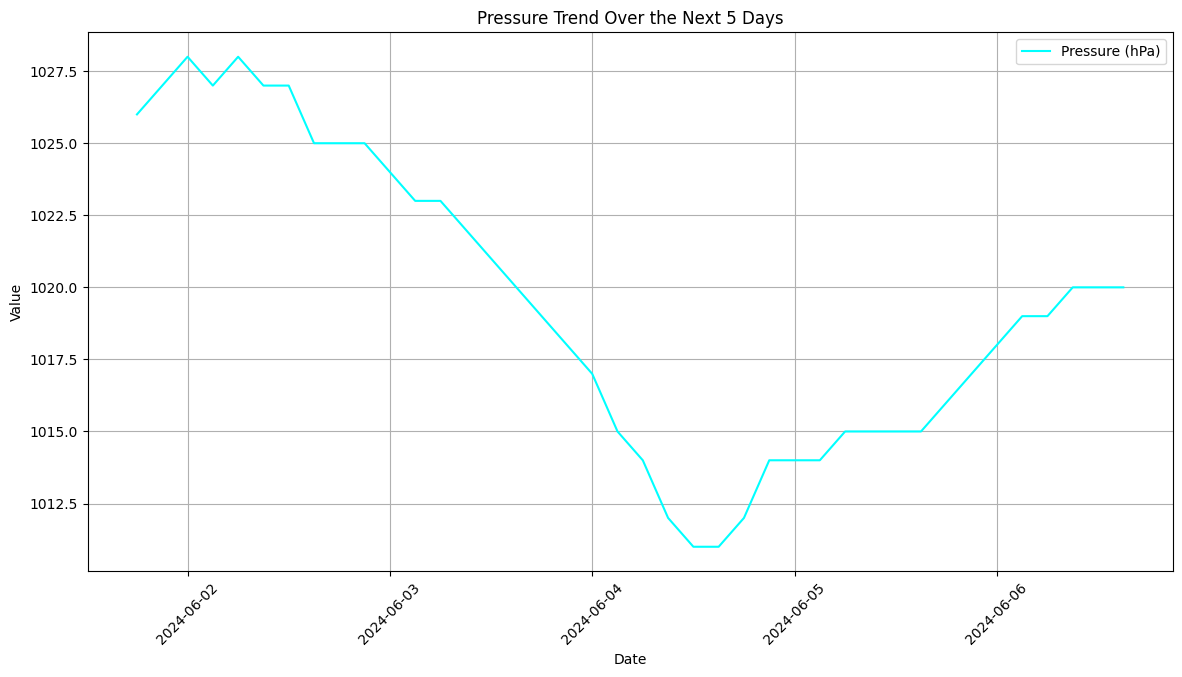

In [50]:
# Plot Pressure
plt.figure(figsize=(14, 7))
plt.plot(data['DATE'], data['PRESSURE'], label='Pressure (hPa)', color='cyan', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Pressure Trend Over the Next 5 Days')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\P R Y N S\AppData\Local\Temp\ipykernel_88100\1387376333.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='DESCRIPTION', palette='viridis')


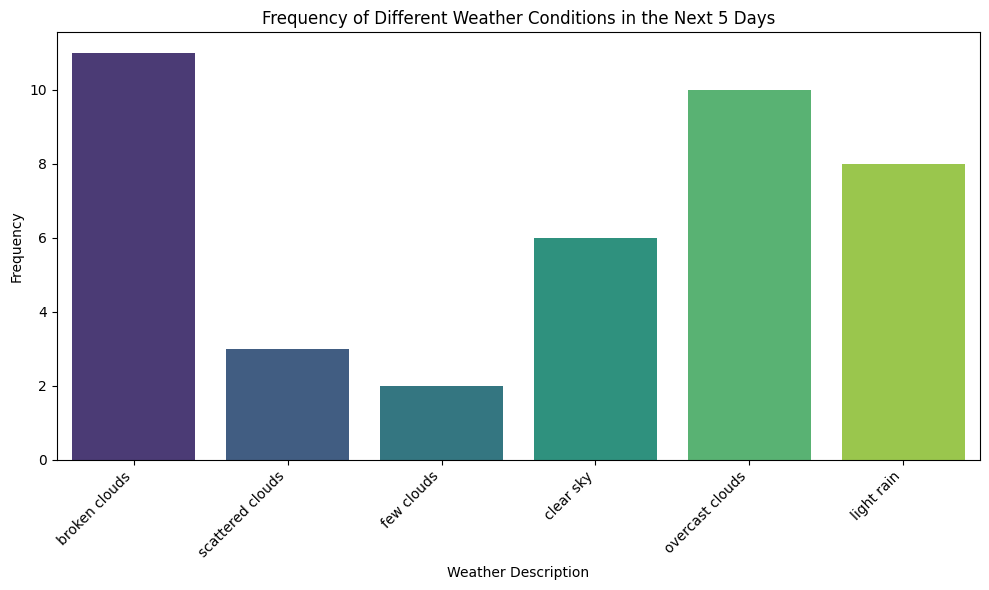

In [51]:
#frequency of different weather conditions
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='DESCRIPTION', palette='viridis')
plt.xlabel('Weather Description')
plt.ylabel('Frequency')
plt.title('Frequency of Different Weather Conditions in the Next 5 Days')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


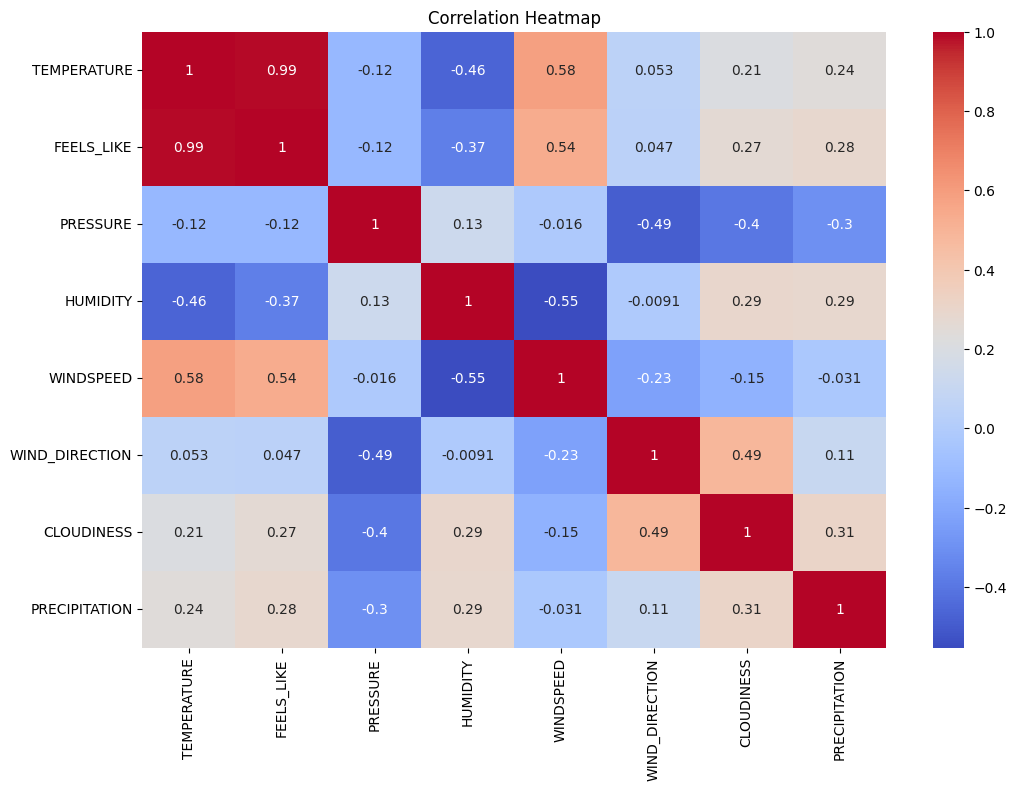

In [52]:
#correlation heatmap
numeric_data = data[['TEMPERATURE','FEELS_LIKE','PRESSURE','HUMIDITY','WINDSPEED','WIND_DIRECTION','CLOUDINESS','PRECIPITATION']]
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


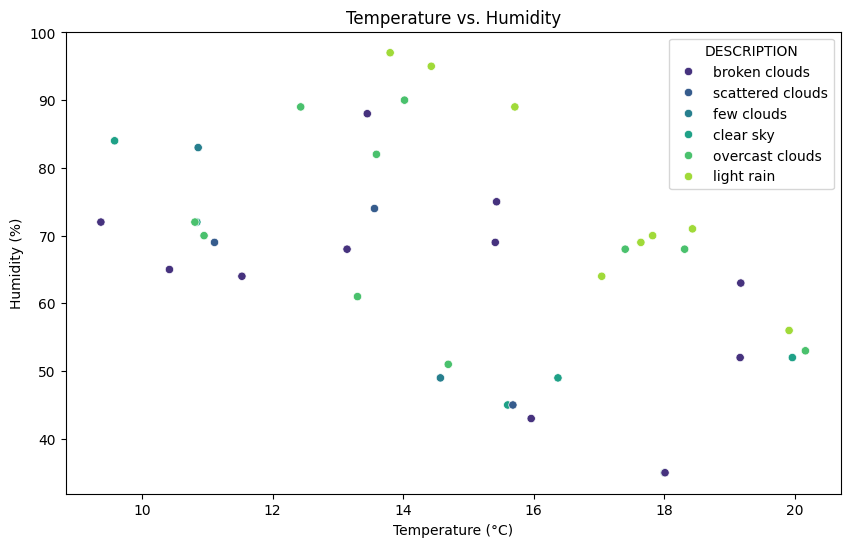

In [53]:
#Temperature vs humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TEMPERATURE', y='HUMIDITY', hue='DESCRIPTION', palette='viridis')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs. Humidity')
plt.show()


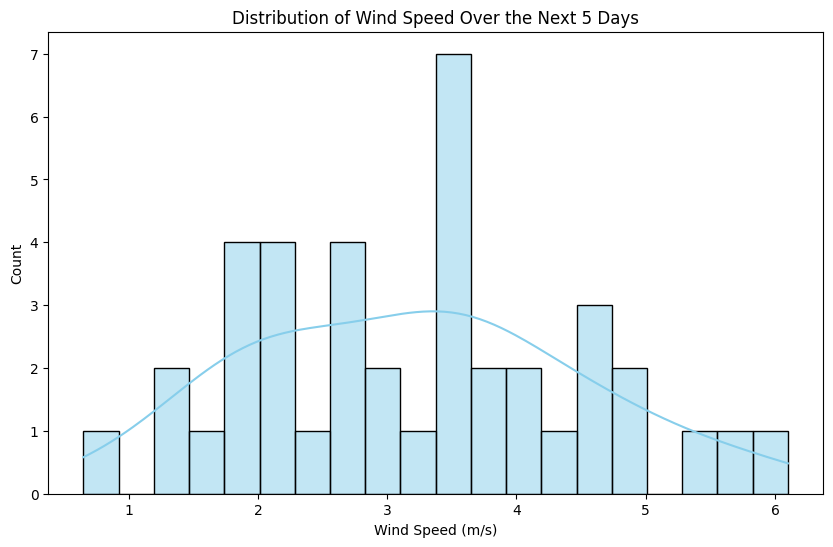

In [54]:
# Wind Speed Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['WINDSPEED'], bins=20, kde=True, color='skyblue')
plt.xlabel('Wind Speed (m/s)')
plt.title('Distribution of Wind Speed Over the Next 5 Days')
plt.show()


C:\Users\P R Y N S\AppData\Local\Temp\ipykernel_88100\2963113334.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_avg_temp, x='DATE', y='TEMPERATURE', palette='viridis')


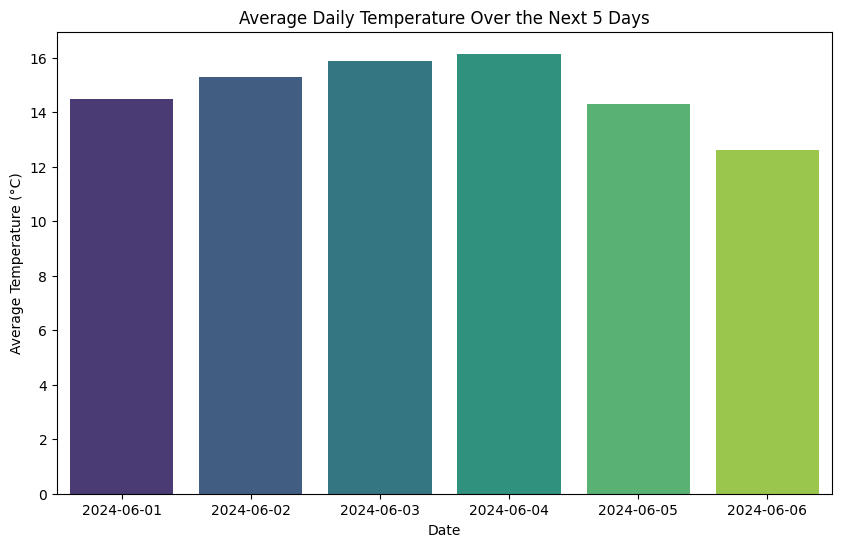

In [55]:
#Average daily Temperature
data['DATE'] = pd.to_datetime(data['DATE'])
data['DATE'] = data['DATE'].dt.date
daily_avg_temp = data.groupby('DATE')['TEMPERATURE'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=daily_avg_temp, x='DATE', y='TEMPERATURE', palette='viridis')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Daily Temperature Over the Next 5 Days')
plt.show()
